In [1]:
#Se importan los paquetes necesarios para los cálculos.
import pandas as pd #manejo de datos
import numpy as np #parquete de matemática
import scipy.stats as sp #paquete de estadísticas
from sqlalchemy import create_engine #consultas a sql
import sqlalchemy #manejo de sql
import sys #manejo del sistema para recibir argumentos
import warnings #
from sqlalchemy import text
warnings.filterwarnings("ignore")
import pyodbc

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import funciones
import comparacionfunciones as cp

In [2]:
ponderaciones = pd.read_excel('Ponderaciones_producto.xlsx', sheet_name='pond_suma')
ponderaciones = ponderaciones.rename(columns = {'REPUBLICA':'REPUBLICA_2010','REG. I':'01_2010', 'REG. II':'02_2010', 'REG. III':'03_2010', 'REG. IV':'04_2010', 'REG. V':'05_2010', 'REG. VI':'06_2010', 'REG. VII':'07_2010', 'REG. VIII':'08_2010'})
ponderaciones = ponderaciones.rename(columns = {'NACIONAL':'REPUBLICA_2023','REGION_1':'01_2023', 'REGION_2':'02_2023', 'REGION_3':'03_2023', 'REGION_4':'04_2023', 'REGION_5':'05_2023', 'REGION_6':'06_2023', 'REGION_7':'07_2023', 'REGION_8':'08_2023'})
ponderaciones['DESCRIPCION'] = ponderaciones['DESCRIPCION'].str.strip()
#ponderaciones

In [3]:
#numero = int(input('Ingrese el numero de datos a mostrar: '))
num = 15

Comparacion de las ponderaciones a nivel republica

In [4]:
top = ponderaciones[['DESCRIPCION', 'REPUBLICA_2010', 'REPUBLICA_2023']].fillna(0).head(num).sort_values(by='REPUBLICA_2010', ascending=False)

In [5]:
last = ponderaciones[['DESCRIPCION', 'REPUBLICA_2010', 'REPUBLICA_2023']].fillna(0).tail(num).sort_values(by='REPUBLICA_2010', ascending=False)

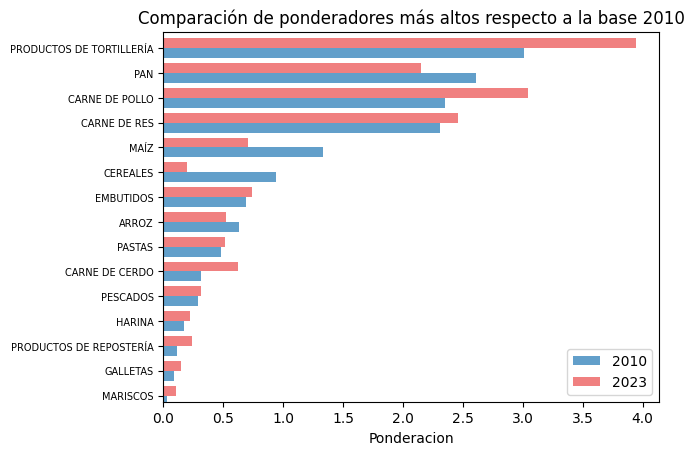

In [6]:
cp.grafpon(top, 'altos')

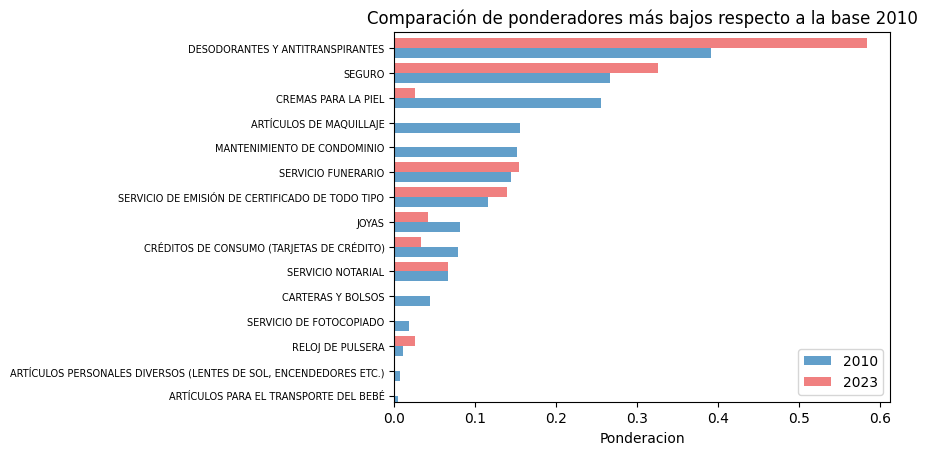

In [7]:
cp.grafpon(last, 'bajos')

In [8]:
'''def graf_regpon(region: str):
    #primero se obtiene el dataframe de las ponderaciones mas altas y mas bajas
    topreg = ponderaciones[['DESCRIPCION', f'{region}_2010', f'{region}_2023']].fillna(0).head(num).sort_values(by=f'{region}_2010', ascending=False)
    lastreg = ponderaciones[['DESCRIPCION', f'{region}_2010', f'{region}_2023']].fillna(0).tail(num).sort_values(by=f'{region}_2010', ascending=False)

    #esta funcion se usa para graficar los datos para cada region
    def greg(data, region, tipo: str):
        ax = data.plot(kind='barh', x='DESCRIPCION', y=f'{region}_2010', legend=True, color='#629fca', position=0, width=0.4)
        data.plot(kind='barh', x='DESCRIPCION', y=f'{region}_2023', legend=True, color='lightcoral', ax=ax, position=1, width=0.4)
        ax.invert_yaxis()
        ax.set_ylabel('')  # Remove y-axis label
        plt.xlabel('Ponderacion')
        plt.title(f'Comparación de ponderadores más {tipo} de la region {region} respecto a la base 2010')
        plt.yticks(fontsize=7)
        plt.legend(['2010', '2023'])
    
    greg(topreg, region, 'altos')
    greg(lastreg, region, 'bajos')'''

"def graf_regpon(region: str):\n    #primero se obtiene el dataframe de las ponderaciones mas altas y mas bajas\n    topreg = ponderaciones[['DESCRIPCION', f'{region}_2010', f'{region}_2023']].fillna(0).head(num).sort_values(by=f'{region}_2010', ascending=False)\n    lastreg = ponderaciones[['DESCRIPCION', f'{region}_2010', f'{region}_2023']].fillna(0).tail(num).sort_values(by=f'{region}_2010', ascending=False)\n\n    #esta funcion se usa para graficar los datos para cada region\n    def greg(data, region, tipo: str):\n        ax = data.plot(kind='barh', x='DESCRIPCION', y=f'{region}_2010', legend=True, color='#629fca', position=0, width=0.4)\n        data.plot(kind='barh', x='DESCRIPCION', y=f'{region}_2023', legend=True, color='lightcoral', ax=ax, position=1, width=0.4)\n        ax.invert_yaxis()\n        ax.set_ylabel('')  # Remove y-axis label\n        plt.xlabel('Ponderacion')\n        plt.title(f'Comparación de ponderadores más {tipo} de la region {region} respecto a la base 2010

In [9]:
reg_cods = ['01', '02', '03', '04', '05', '06', '07', '08']

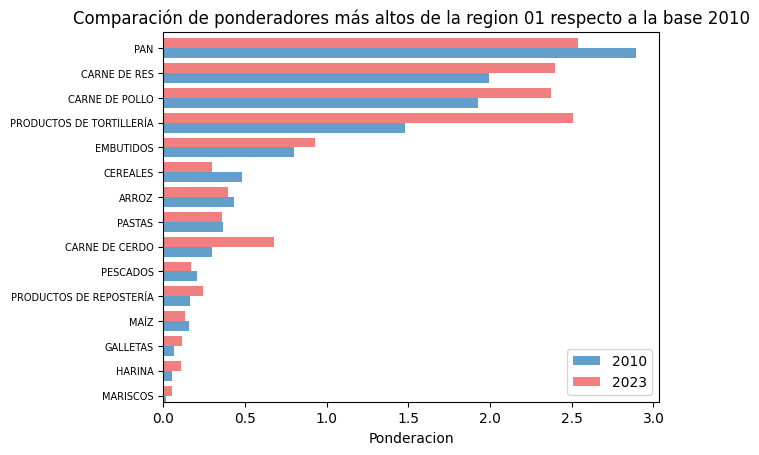

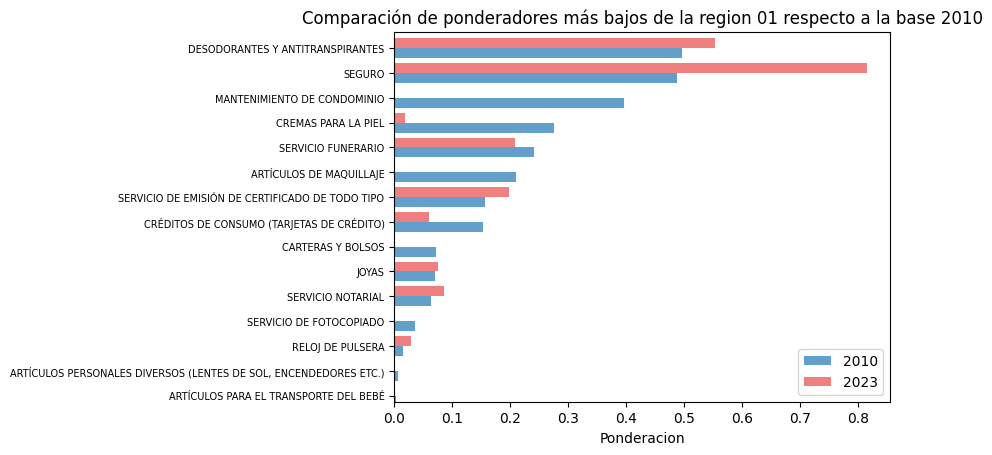

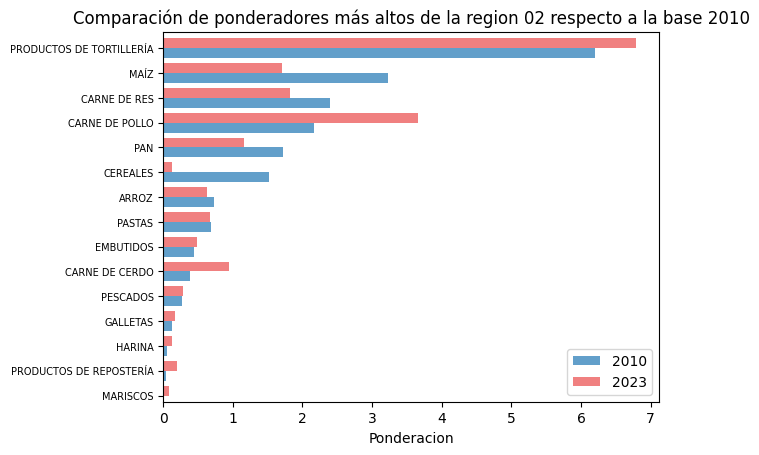

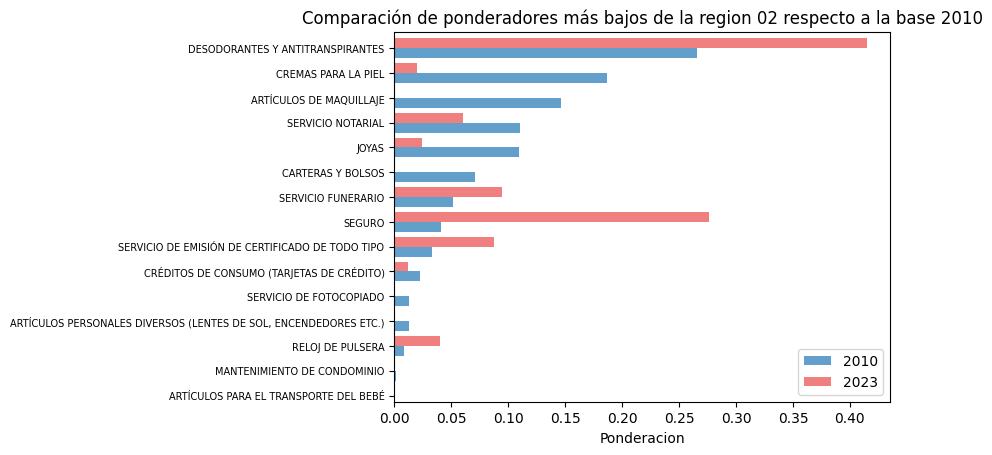

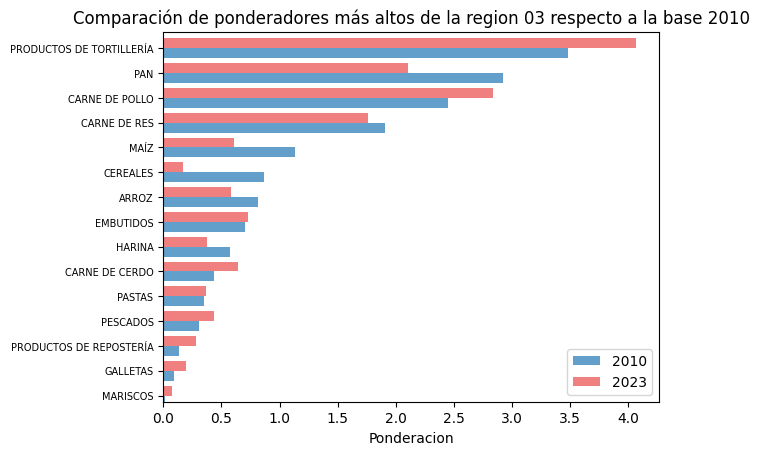

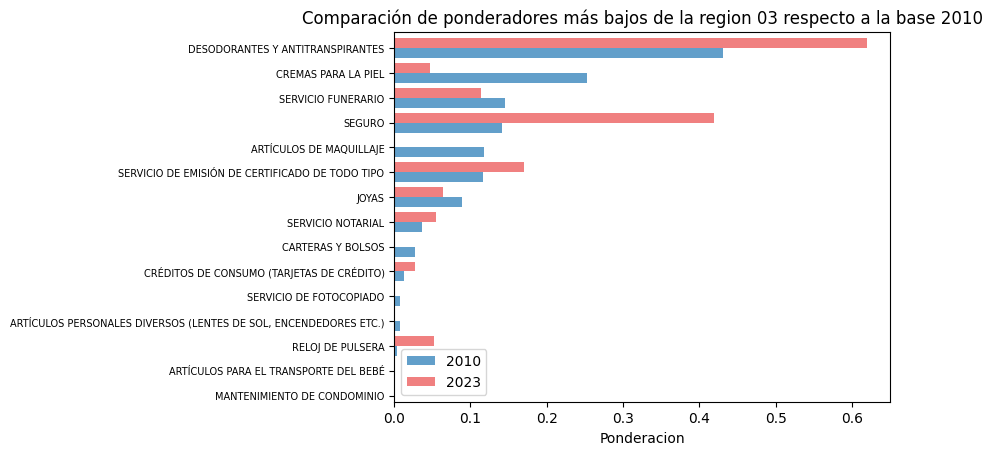

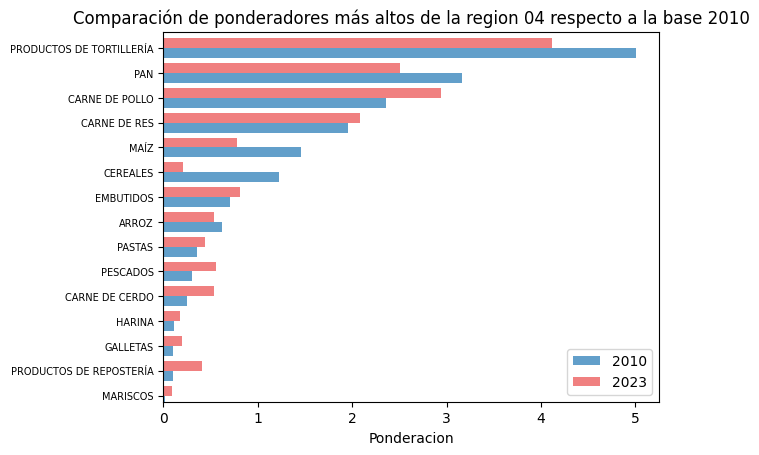

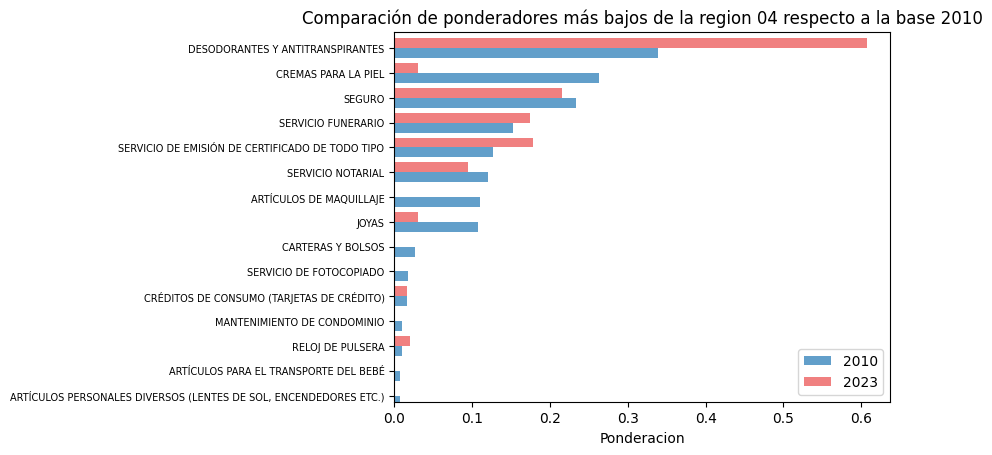

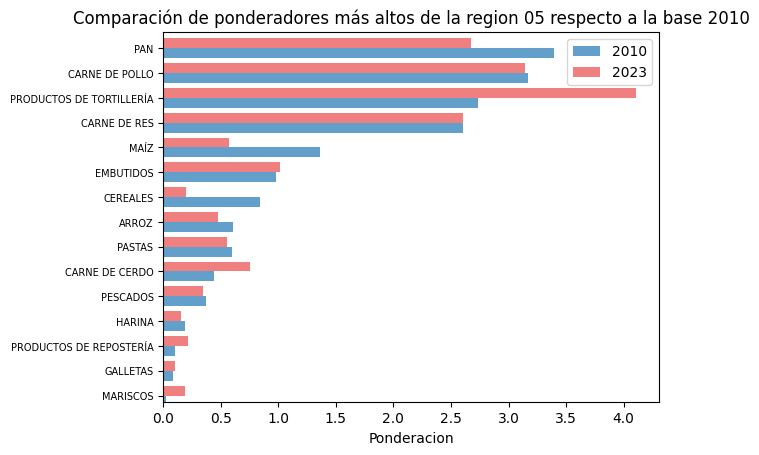

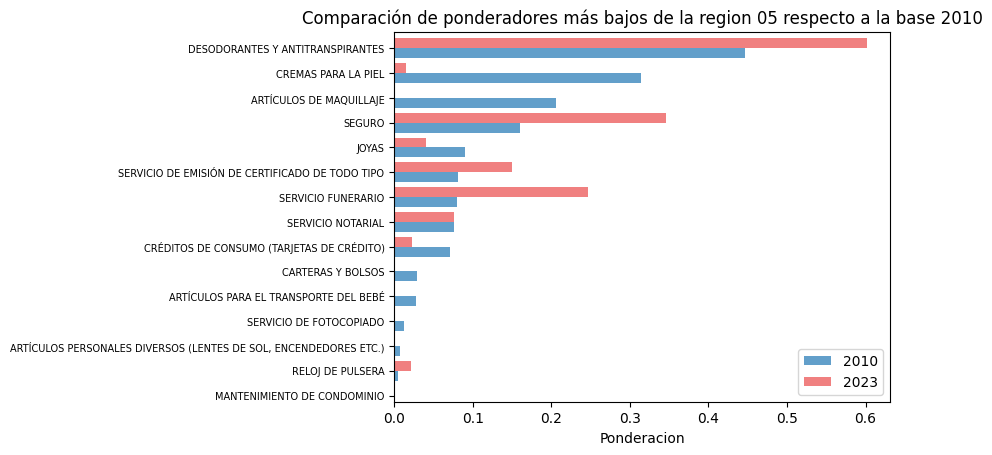

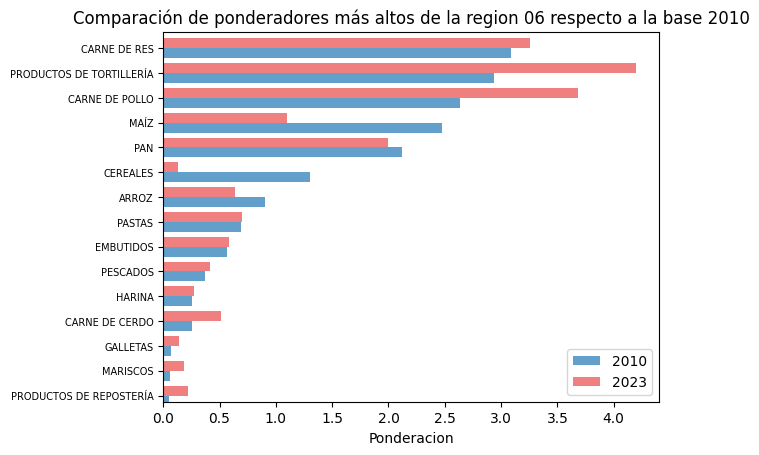

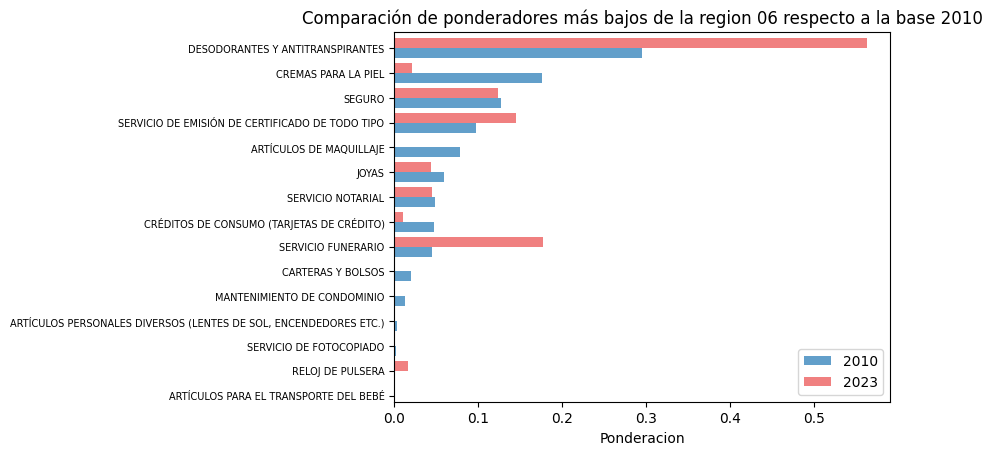

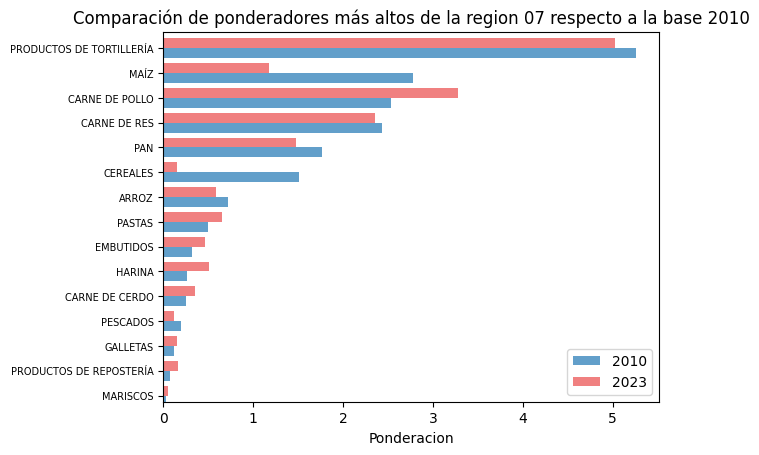

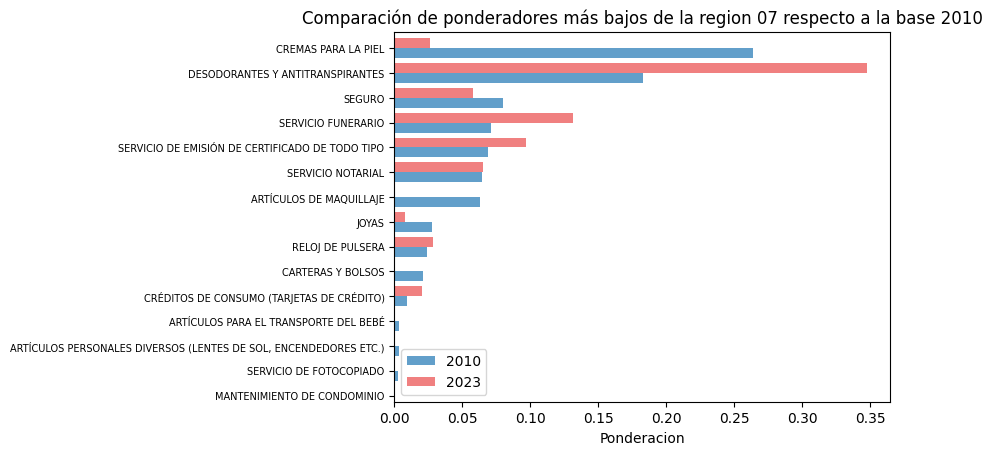

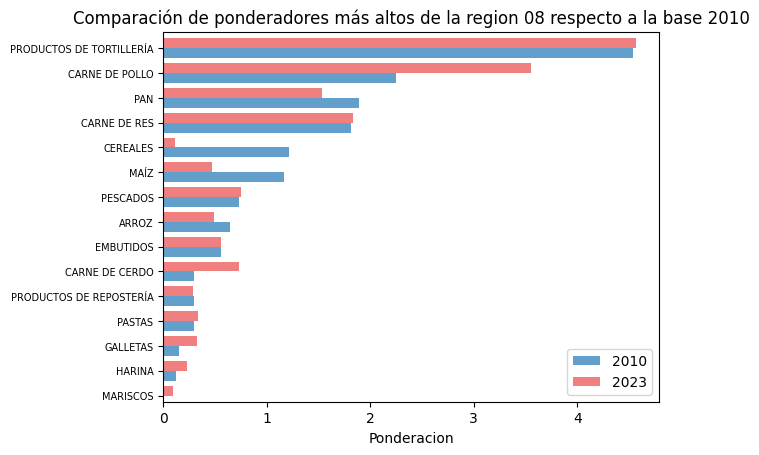

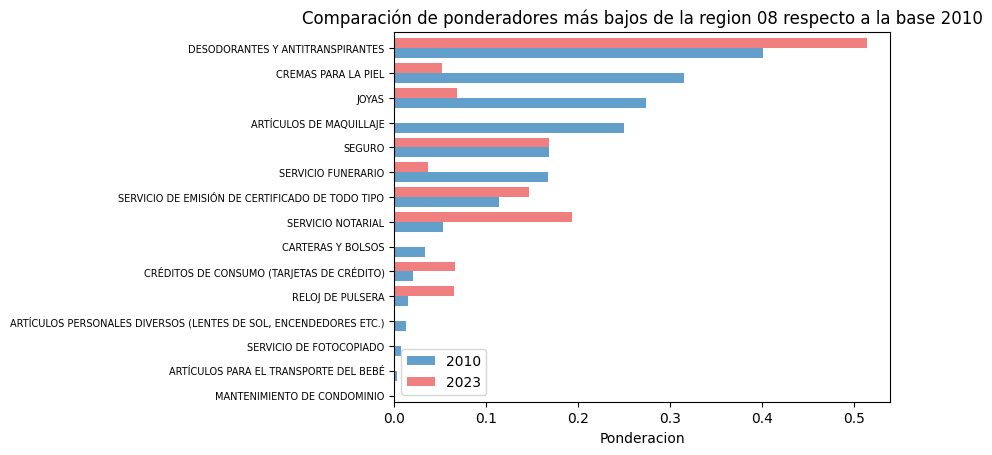

In [10]:
for regcod in reg_cods:
    cp.graf_regpon(regcod, ponderaciones, num)